In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
import sagemaker
import boto3
import os
from sagemaker.amazon.amazon_estimator import get_image_uri

In [61]:
sagemaker_session = sagemaker.Session()
role = sagemaker.get_execution_role()
bucket = sagemaker_session.default_bucket()

In [62]:
data_dir = 'capstone_project_data'

prefix ='sagemaker/Capstone_project'

In [63]:
session = sagemaker.Session()
container = get_image_uri(session.boto_region_name, 'xgboost')

In [64]:
bike2019 =pd.read_csv(os.path.join(data_dir, "clean_bikes.csv"),names=None)

In [65]:
X=bike2019.copy()

In [66]:
X

,Unnamed: 0,duration_min,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,...,user_type,member_gender,bike_share_for_all_trip,Customer_age,general_runtime,Customer_decade,hour_start,day_start,month_start,day_period
0,0,869.750000,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,...,Customer,Male,No,35.0,long,30s,17,3,2,afternoon
1,2,1030.900000,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,...,Customer,Male,No,47.0,long,40s,12,3,2,morning
2,3,608.166667,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,...,Subscriber,Other,No,30.0,long,18s,17,3,2,afternoon
3,4,26.416667,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,...,Subscriber,Male,Yes,45.0,long,40s,23,3,2,night
4,5,29.883333,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,...,Subscriber,Male,No,60.0,long,50s,23,3,2,night
5,6,19.116667,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,...,Subscriber,Female,No,36.0,long,30s,23,3,2,night
6,7,26.916667,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,...,Subscriber,Male,No,30.0,long,18s,23,3,2,night
7,8,26.166667,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,...,Subscriber,Other,No,31.0,long,30s,23,3,2,night
8,9,17.483333,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,...,Subscriber,Male,No,27.0,long,18s,23,3,2,night
9,10,7.633333,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,...,Subscriber,Female,Yes,23.0,casual,18s,23,3,2,night


In [68]:
X=X[X['user_type']=='Subscriber']

In [67]:
upload_data= sagemaker_session.upload_data(path=data_dir, bucket=bucket, key_prefix=prefix)

In [69]:
X.drop(['Unnamed: 0','month_start','user_type', 'start_station_name','end_station_id','end_station_name', 'end_station_latitude', 'end_station_longitude','general_runtime'], axis=1,inplace=True)

/home/ec2-user/anaconda3/envs/tensorflow_p27/lib/python2.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [70]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158386 entries, 2 to 174951
Data columns (total 12 columns):
duration_min               158386 non-null float64
start_station_id           158386 non-null float64
start_station_latitude     158386 non-null float64
start_station_longitude    158386 non-null float64
bike_id                    158386 non-null int64
member_gender              158386 non-null object
bike_share_for_all_trip    158386 non-null object
Customer_age               158386 non-null float64
Customer_decade            158386 non-null object
hour_start                 158386 non-null int64
day_start                  158386 non-null int64
day_period                 158386 non-null object
dtypes: float64(5), int64(3), object(4)
memory usage: 15.7+ MB


In [71]:
X=pd.get_dummies(X)

In [72]:
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,duration_min,start_station_id,start_station_latitude,start_station_longitude,bike_id,Customer_age,hour_start,day_start,member_gender_Female,member_gender_Male,member_gender_Other,bike_share_for_all_trip_No,bike_share_for_all_trip_Yes,Customer_decade_18s,Customer_decade_30s,Customer_decade_40s,Customer_decade_50s,Customer_decade_60s,Customer_decade_>70,Customer_decade_underage,day_period_aftermidnigt,day_period_afternoon,day_period_midday,day_period_morning,day_period_night
duration_min,1,-0.0093,0.011,-0.039,0.019,0.015,0.003,0.017,0.023,-0.032,0.03,-0.012,0.012,-0.0045,-0.0049,0.0037,0.0091,0.0085,-0.0015,0.0097,-0.0035,-0.00023,0.011,-0.0048,-0.0049
start_station_id,-0.0093,1,-0.21,0.48,-0.071,-0.12,0.016,0.058,-0.0066,-0.00023,0.02,-0.24,0.24,0.14,-0.079,-0.055,-0.038,-0.0093,-0.0061,0.0066,0.025,-0.037,0.017,-0.021,0.053
start_station_latitude,0.011,-0.21,1,-0.69,0.056,0.082,-0.02,-0.012,0.055,-0.067,0.042,0.43,-0.43,-0.13,0.097,0.036,0.025,-0.0097,0.0044,0.0057,-0.008,0.022,-0.016,0.018,-0.037
start_station_longitude,-0.039,0.48,-0.69,1,-0.14,-0.13,0.056,0.024,-0.029,0.03,-0.0058,-0.5,0.5,0.18,-0.13,-0.05,-0.035,0.014,-0.0051,0.0049,0.0016,-0.015,0.037,-0.051,0.059
bike_id,0.019,-0.071,0.056,-0.14,1,-0.039,0.015,0.044,-0.025,0.022,0.0064,0.025,-0.025,0.015,0.018,-0.015,-0.026,-0.034,-0.0058,-0.013,0.0051,-0.016,0.056,-0.032,-0.0035
Customer_age,0.015,-0.12,0.082,-0.13,-0.039,1,-0.062,-0.031,-0.052,0.042,0.025,0.061,-0.061,-0.7,0.032,0.4,0.53,0.39,0.28,-0.011,0.016,-0.028,0.037,0.032,-0.075
hour_start,0.003,0.016,-0.02,0.056,0.015,-0.062,1,0.022,-0.029,0.025,0.0079,-0.051,0.051,0.058,-0.024,-0.026,-0.023,-0.016,-0.0078,-0.0048,-0.38,0.55,0.14,-0.75,0.49
day_start,0.017,0.058,-0.012,0.024,0.044,-0.031,0.022,1,0.0022,-0.0034,0.0038,-0.05,0.05,0.043,-0.03,-0.022,-0.0024,0.0066,0.0024,0.0026,0.0044,-0.064,0.1,-0.037,0.015
member_gender_Female,0.023,-0.0066,0.055,-0.029,-0.025,-0.052,-0.029,0.0022,1,-0.95,-0.078,0.018,-0.018,0.046,-0.001,-0.032,-0.028,-0.03,-0.015,0.012,-0.02,-0.0037,0.00032,0.031,-0.035
member_gender_Male,-0.032,-0.00023,-0.067,0.03,0.022,0.042,0.025,-0.0034,-0.95,1,-0.25,-0.0033,0.0033,-0.036,-0.0037,0.032,0.015,0.035,0.01,-0.012,0.022,0.0038,-0.0025,-0.029,0.033


In [73]:
corr['duration_min']

duration_min                   1.000000
start_station_id              -0.009263
start_station_latitude         0.010902
start_station_longitude       -0.039138
bike_id                        0.019147
Customer_age                   0.014826
hour_start                     0.003003
day_start                      0.016893
member_gender_Female           0.023133
member_gender_Male            -0.032122
member_gender_Other            0.029663
bike_share_for_all_trip_No    -0.011593
bike_share_for_all_trip_Yes    0.011593
Customer_decade_18s           -0.004494
Customer_decade_30s           -0.004891
Customer_decade_40s            0.003706
Customer_decade_50s            0.009115
Customer_decade_60s            0.008479
Customer_decade_>70           -0.001524
Customer_decade_underage       0.009670
day_period_aftermidnigt       -0.003485
day_period_afternoon          -0.000231
day_period_midday              0.010984
day_period_morning            -0.004756
day_period_night              -0.004861


In [74]:
# Remove rows with missing target, separate target from predictors

y = X.duration_min              
X.drop(['duration_min'], axis=1, inplace=True)

# Break off validation set from training data

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.9, test_size=0.1, random_state=1)

In [75]:
def make_csv(x, y, filename, data_dir):
    '''Merges features and labels and converts them into one csv file with labels in the first column.
       :param x: Data features
       :param y: Data labels
       :param file_name: Name of csv file, ex. 'train.csv'
       :param data_dir: The directory where files will be saved
       '''
    # make data dir, if it does not exist
    if not os.path.exists(data_dir):
        os.makedirs(data_dir)
    
    # your code here
    df_to_save=pd.concat([pd.DataFrame(y), pd.DataFrame(x)],axis=1)
    
    df_to_save.to_csv(os.path.join(data_dir, filename), header=False, index=False)
    # nothing is returned, but a print statement indicates that the function has run
    print('Path created: '+str(data_dir)+'/'+str(filename))

In [76]:
make_csv(X_train, y_train,'Train.csv', data_dir)

Path created: capstone_project_data/Train.csv


In [77]:
X_test.to_csv(os.path.join(data_dir, 'Test.csv'), header=False, index=False)

In [78]:
make_csv(X_val, y_val,'Val.csv', data_dir)

Path created: capstone_project_data/Val.csv


In [79]:

xgb = sagemaker.estimator.Estimator(container, # The location of the container we wish to use
                                    role,                                    # What is our current IAM Role
                                    train_instance_count=1,                  # How many compute instances
                                    train_instance_type='ml.m4.xlarge',      # What kind of compute instances
                                    output_path='s3://{}/{}/output'.format(session.default_bucket(), prefix),
                                    sagemaker_session=session)

# TODO: Set the XGBoost hyperparameters in the xgb object. Don't forget that in this case we have a binary
#       label so we should be using the 'binary:logistic' objective.

# Solution:
xgb.set_hyperparameters(max_depth=5,
                        eta=0.2,
                        gamma=4,
                        min_child_weight=6,
                        subsample=0.8,
                        silent=0,
                        objective='reg:linear',
                        eval_metric='mae',
                        early_stopping_rounds=10,
                        num_round=500)

In [80]:
from sagemaker.tuner import IntegerParameter, ContinuousParameter, HyperparameterTuner,CategoricalParameter



xgb_hyperparameter_tuner = HyperparameterTuner(estimator = xgb, # The estimator object to use as the basis for the training jobs.
                                               objective_metric_name = 'validation:mae', # The metric used to compare trained models.
                                               objective_type = 'Minimize', # Whether we wish to minimize or maximize the metric.
                                               max_jobs = 10, # The total number of models to train
                                               max_parallel_jobs = 3, # The number of models to train in parallel
                                               hyperparameter_ranges = {
                                                    'max_depth': IntegerParameter(3, 12),
                                                    'eta'      : ContinuousParameter(0.05, 0.5),
                                                    'min_child_weight': IntegerParameter(2, 8),
                                                    'subsample': ContinuousParameter(0.5, 0.9),
                                                    'gamma': ContinuousParameter(0, 10)
                          
                                               })

In [91]:
test_location = session.upload_data(os.path.join(data_dir, 'Test.csv'), key_prefix=prefix)
val_location = session.upload_data(os.path.join(data_dir, 'Val.csv'), key_prefix=prefix)
train_location = session.upload_data(os.path.join(data_dir, 'Train.csv'), key_prefix=prefix)

In [82]:
from sagemaker.session import s3_input
s3_input_train = sagemaker.s3_input(s3_data=train_location, content_type='csv')
s3_input_validation = sagemaker.s3_input(s3_data=val_location, content_type='csv')

In [83]:
xgb_hyperparameter_tuner.fit({'train': s3_input_train, 'validation': s3_input_validation})

In [84]:
xgb_hyperparameter_tuner.wait()

.........................................................................................................................................................!


In [85]:
xgb_attached = None

xgb_attached = sagemaker.estimator.Estimator.attach(xgb_hyperparameter_tuner.best_training_job())

2020-09-05 10:21:28 Starting - Preparing the instances for training
2020-09-05 10:21:28 Downloading - Downloading input data
2020-09-05 10:21:28 Training - Training image download completed. Training in progress.
2020-09-05 10:21:28 Uploading - Uploading generated training model
2020-09-05 10:21:28 Completed - Training job completedArguments: train
[2020-09-05:10:21:16:INFO] Running standalone xgboost training.
[2020-09-05:10:21:16:INFO] Setting up HPO optimized metric to be : mae
[2020-09-05:10:21:16:INFO] File size need to be processed in the node: 13.21mb. Available memory size in the node: 8500.14mb
[2020-09-05:10:21:16:INFO] Determined delimiter of CSV input is ','
[10:21:16] S3DistributionType set as FullyReplicated
[10:21:16] 128292x24 matrix with 3079008 entries loaded from /opt/ml/input/data/train?format=csv&label_column=0&delimiter=,
[2020-09-05:10:21:16:INFO] Determined delimiter of CSV input is ','
[10:21:16] S3DistributionType set as FullyReplicated
[10:21:16] 14255x24 mat

In [86]:
xgb_transformer = xgb_attached.transformer(instance_count = 1, instance_type = 'ml.m4.xlarge')

In [92]:
xgb_transformer.transform(test_location, content_type='text/csv')

In [93]:
xgb_transformer.wait()

...........................
Arguments: serve
[2020-09-05 10:43:22 +0000] [1] [INFO] Starting gunicorn 19.7.1
[2020-09-05 10:43:22 +0000] [1] [INFO] Listening at: http://0.0.0.0:8080 (1)
[2020-09-05 10:43:22 +0000] [1] [INFO] Using worker: gevent
[2020-09-05 10:43:22 +0000] [36] [INFO] Booting worker with pid: 36
[2020-09-05 10:43:22 +0000] [37] [INFO] Booting worker with pid: 37
[2020-09-05 10:43:22 +0000] [38] [INFO] Booting worker with pid: 38
[2020-09-05:10:43:22:INFO] Model loaded successfully for worker : 36
[2020-09-05:10:43:22:INFO] Model loaded successfully for worker : 37
[2020-09-05 10:43:22 +0000] [39] [INFO] Booting worker with pid: 39
[2020-09-05:10:43:22:INFO] Sniff delimiter as ','
[2020-09-05:10:43:22:INFO] Determined delimiter of CSV input is ','
[2020-09-05:10:43:22:INFO] Model loaded successfully for worker : 38
[2020-09-05:10:43:23:INFO] Model loaded successfully for worker : 39
2020-09-05T10:43:22.902:[sagemaker logs]: MaxConcurrentTransforms=4, MaxPayloadInMB=6, B

In [94]:
!aws s3 cp --recursive $xgb_transformer.output_path $data_dir

download: s3://sagemaker-eu-central-1-033898215755/xgboost-200905-1008-010-9781b41d-2020-09-05-10-38-56-591/Test.csv.out to capstone_project_data/Test.csv.out


In [95]:
predictions = pd.read_csv(os.path.join(data_dir, 'Test.csv.out'), header=None)
predictions = [round(num) for num in predictions.squeeze().values]

In [96]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, predictions)

5.168976366353095

In [41]:
labels=y_test.index[:50]
x = np.arange(len(labels))  # the label locations
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

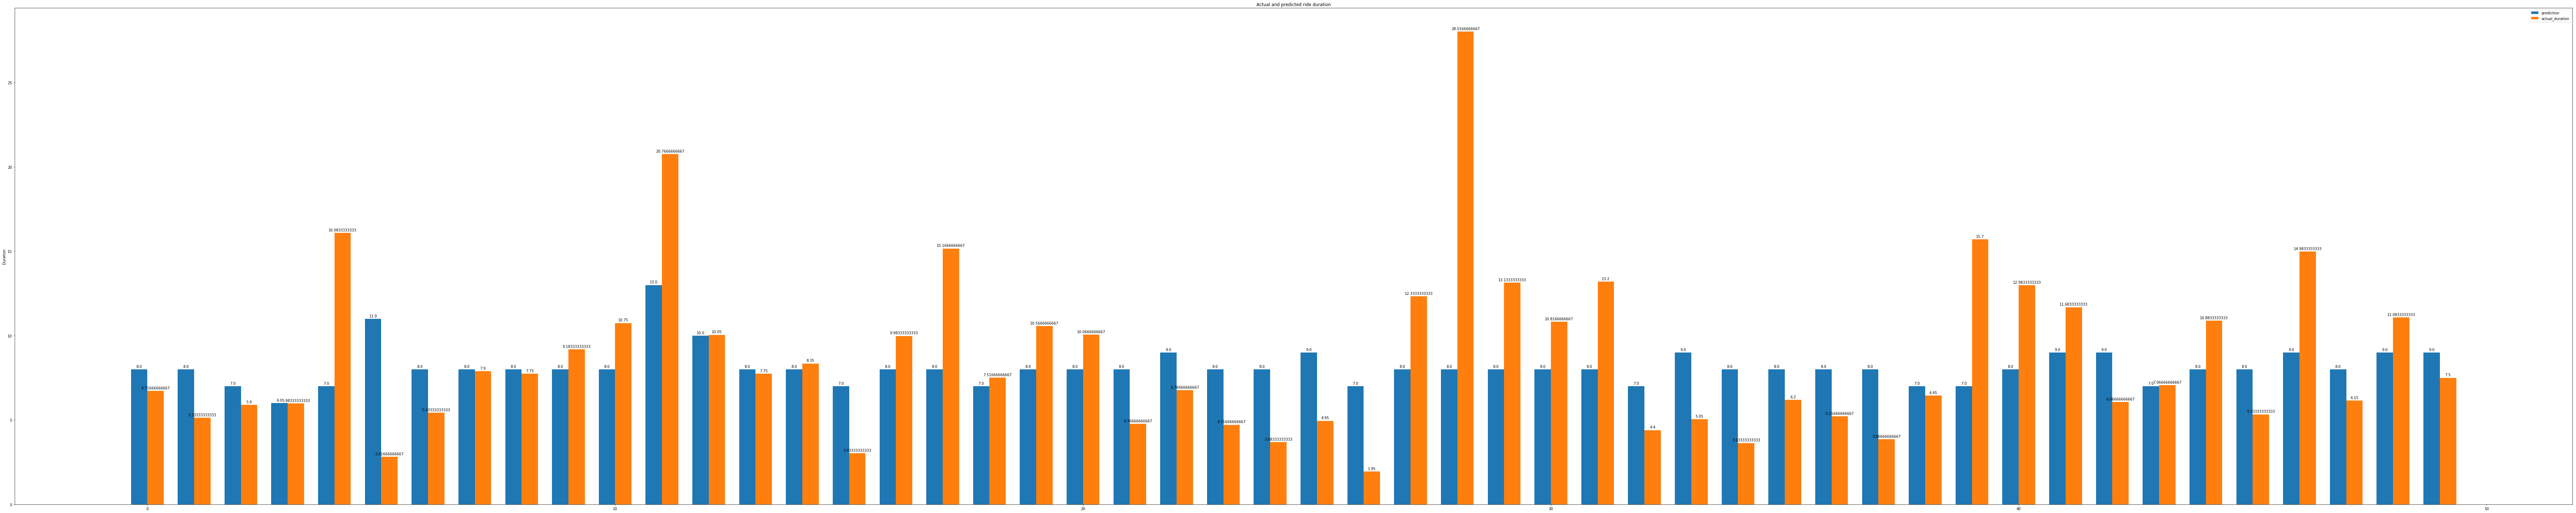

In [42]:
labels=y_test.index[:50]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(100,20))
rects1 = ax.bar(x - width/2, predictions[:50], width, label='prediction')
rects2 = ax.bar(x + width/2, y_test[:50], width, label='actual_duration')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Duration')
ax.set_title('Actual and predicted ride duration')


ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

In [10]:
container2 = get_image_uri(boto3.Session().region_name, 'linear-learner')

In [16]:
from sagemaker import LinearLearner
output_path='s3://{}/{}/linear_output'.format(session.default_bucket(), prefix)

linear = LinearLearner(role=role,
                       train_instance_count=1, 
                       train_instance_type='ml.m4.xlarge',
                       predictor_type='regressor',
                       output_path=output_path,
                       sagemaker_session=sagemaker_session,
                       epochs=15)

X_train=X_train.as_matrix()
y_train=y_train.as_matrix()

train_x_np = X_train.astype('float32')
train_y_np = y_train.astype('float32')


/home/ec2-user/anaconda3/envs/tensorflow_p27/lib/python2.7/site-packages/ipykernel/__main__.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/ec2-user/anaconda3/envs/tensorflow_p27/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [17]:
formatted_train_data = linear.record_set(train_x_np, labels=train_y_np)

linear.fit(formatted_train_data)


2020-09-04 10:24:47 Starting - Starting the training job...
2020-09-04 10:24:50 Starting - Launching requested ML instances......
2020-09-04 10:26:12 Starting - Preparing the instances for training.........
2020-09-04 10:27:34 Downloading - Downloading input data...
2020-09-04 10:28:16 Training - Training image download completed. Training in progress..Docker entrypoint called with argument(s): train
Running default environment configuration script
[09/04/2020 10:28:20 INFO 140410941597504] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'loss_insensitivity': u'0.01', u'epochs': u'15', u'feature_dim': u'auto', u'init_bias': u'0.0', u'lr_scheduler_factor': u'auto', u'num_calibration_samples': u'10000000', u'accuracy_top_k': u'3', u'_num_kv_servers': u'auto', u'use_bias': u'true', u'num_point_for_scaler': u'10000', u'_log_level': u'info', u'quantile': u'0.5', u'bias_lr_mult': u'auto', u'lr_scheduler_step': u'auto', u'in


2020-09-04 10:28:42 Uploading - Uploading generated training model[2020-09-04 10:28:34.320] [tensorio] [info] epoch_stats={"data_pipeline": "/opt/ml/input/data/train", "epoch": 11, "duration": 2552, "num_examples": 129, "num_bytes": 17960880}
#metrics {"Metrics": {"train_mse_objective": {"count": 1, "max": 0.7588129879236222, "sum": 0.7588129879236222, "min": 0.7588129879236222}}, "EndTime": 1599215314.321108, "Dimensions": {"model": 0, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 4}, "StartTime": 1599215314.321008}

#metrics {"Metrics": {"train_mse_objective": {"count": 1, "max": 0.7594684089422226, "sum": 0.7594684089422226, "min": 0.7594684089422226}}, "EndTime": 1599215314.321209, "Dimensions": {"model": 1, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 4}, "StartTime": 1599215314.321189}

#metrics {"Metrics": {"train_mse_objective": {"count": 1, "max": 0.7588080340623855, "sum": 0.7588080340623855, "min": 0


2020-09-04 10:28:49 Completed - Training job completed
Training seconds: 75
Billable seconds: 75


In [21]:
linear_predictor = linear.deploy(initial_instance_count=1, instance_type='ml.m4.xlarge')

---------------!

In [41]:
test_x_np = X_test.astype('float32')
result = linear_predictor.predict(test_x_np)


In [53]:
result

[label {
   key: "score"
   value {
     float32_tensor {
       values: 10.2003173828
     }
   }
 }, label {
   key: "score"
   value {
     float32_tensor {
       values: 11.3481445312
     }
   }
 }, label {
   key: "score"
   value {
     float32_tensor {
       values: 7.91979980469
     }
   }
 }, label {
   key: "score"
   value {
     float32_tensor {
       values: 8.73815917969
     }
   }
 }, label {
   key: "score"
   value {
     float32_tensor {
       values: 12.1013183594
     }
   }
 }, label {
   key: "score"
   value {
     float32_tensor {
       values: 12.5858154297
     }
   }
 }, label {
   key: "score"
   value {
     float32_tensor {
       values: 13.3043212891
     }
   }
 }, label {
   key: "score"
   value {
     float32_tensor {
       values: 9.79260253906
     }
   }
 }, label {
   key: "score"
   value {
     float32_tensor {
       values: 10.7283935547
     }
   }
 }, label {
   key: "score"
   value {
     float32_tensor {
       values: 10.579956

In [54]:
def evaluate(predictor, test_features, test_labels, verbose=True):
    
    prediction_batches = [predictor.predict(batch) for batch in np.array_split(test_features, 100)]
   
    test_preds = np.concatenate([np.array([x.label['score'].float32_tensor.values[0] for x in batch]) 
                                 for batch in prediction_batches])
    
  
    return(mean_absolute_error(test_labels, test_preds))

In [55]:
linear_mae=evaluate(linear_predictor, test_x_np, y_test, verbose=True)
linear_mae

5.56932102661531

In [58]:
boto3.client('sagemaker').delete_endpoint(EndpointName=linear_predictor.endpoint)

{'ResponseMetadata': {'HTTPHeaders': {'content-length': '0',
   'content-type': 'application/x-amz-json-1.1',
   'date': 'Fri, 04 Sep 2020 11:27:03 GMT',
   'x-amzn-requestid': '33272521-ed45-43d8-82ff-75489049b07f'},
  'HTTPStatusCode': 200,
  'RequestId': '33272521-ed45-43d8-82ff-75489049b07f',
  'RetryAttempts': 0}}